In [6]:
! pip3 install lime
! pip3 install sklearn


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last res

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

TREATED_DATASET = '../dataset/fake_job_word2vec.csv'

In [8]:
import pickle

# Carregar o DataFrame com pickle
with open('../dataset/fake_job_word2vec.pkl', 'rb') as f:
    data = pickle.load(f)

In [9]:
data.salary_max.tail(6)

17874    100000
17875         0
17876         0
17877         0
17878         0
17879         0
Name: salary_max, dtype: int64

In [10]:
colums_to_drop = ['fraudulent']

X = data.drop(columns=colums_to_drop)
Y = data['fraudulent']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [12]:
sm = SMOTE(random_state=42, k_neighbors=5)
X_train_sm, y_train_sm = sm.fit_resample(X_train, Y_train)

In [13]:
X_test.head()

,telecommuting,has_company_logo,has_questions,salary_min,salary_max,employment_type_-,employment_type_Contract,employment_type_Full-time,employment_type_Other,employment_type_Part-time,...,required_education_Vocational - HS Diploma,title_vector,location_vector,department_vector,company_profile_vector,description_vector,requirements_vector,benefits_vector,industry_vector,function_vector
10377,0,1,0,0,0,0,0,1,0,0,...,0,-0.003962,0.070271,0.0,-0.090977,0.016053,0.017330,0.000000,-0.044660,-0.101499
16516,0,1,0,90,150,0,0,1,0,0,...,0,0.021611,0.122119,0.0,0.014225,0.003874,0.000000,0.000000,-0.080846,-0.022311
6087,0,0,0,0,0,0,0,1,0,0,...,0,-0.172105,0.128017,0.0,0.000000,0.009502,-0.033398,0.000000,-0.300484,0.000000
1285,0,1,1,0,0,0,0,1,0,0,...,0,0.062540,0.084722,0.0,-0.027113,0.025841,0.015845,0.057674,-0.084057,0.131404
10573,0,1,0,0,0,1,0,0,0,0,...,0,-0.003605,0.030940,0.0,0.000000,0.004361,0.000000,0.000000,0.000000,0.000000


### Random Forest

In [14]:
rf = RandomForestClassifier().fit(X_train_sm, y_train_sm)

has_company_logo                        0.016651
company_profile_vector                  0.016530
has_questions                           0.008407
benefits_vector                         0.007515
industry_vector                         0.007244
required_experience_Mid-Senior level    0.006403
location_vector                         0.005273
department_vector                       0.004611
function_vector                         0.004119
required_experience_Associate           0.004029
dtype: float64


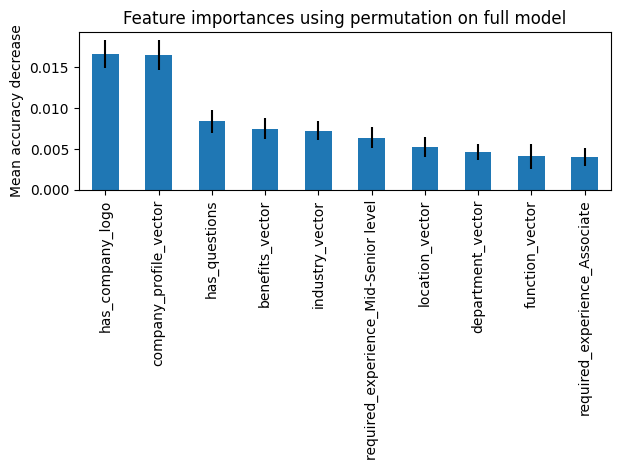

In [15]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(rf, X_test, Y_test,n_repeats=100, random_state=0)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

forest_importances_sorted = forest_importances.sort_values(ascending=False)

# Selecionar as 10 features mais importantes
top_10_features = forest_importances_sorted.head(10)
print(top_10_features)
top_10_indices = [X_test.columns.get_loc(col) for col in top_10_features.index]
top_10_std = result.importances_std[top_10_indices]

# Plotar as 10 features mais importantes
fig, ax = plt.subplots()
top_10_features.plot.bar(yerr=top_10_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Confusion Matrix

Acurácia dos dados de teste:  0.9751677852348993



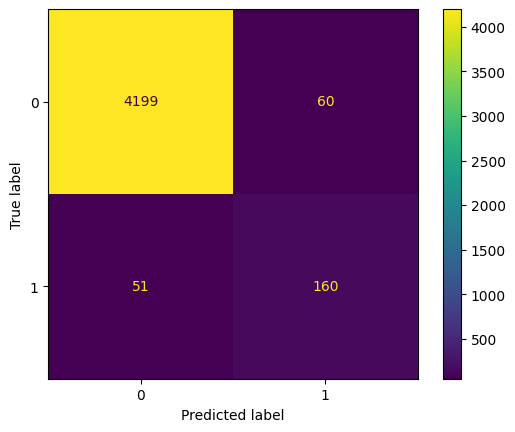

In [16]:
y_pred = rf.predict(X_test)

print("Acurácia dos dados de teste: ", accuracy_score(Y_test,y_pred))
print()

cm = confusion_matrix(Y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()

plt.show()

## Evaluation Metrics

Precision

In [17]:
precision_score_number = precision_score(Y_test, y_pred)

Recall

In [18]:
recall_score_number = recall_score(Y_test, y_pred)

F1-Score

In [19]:
f1_score_number = f1_score(Y_test, y_pred)

Func for printing all the evaluate metrics

In [20]:
def get_evaluate_metrics():
    print(f'''
        Precision Score of the fake class is: {precision_score_number}
        Recall Score of the fake class is: {recall_score_number}
        F1 Score of the fake class is: {f1_score_number}
    ''')

In [21]:
get_evaluate_metrics()


        Precision Score of the fake class is: 0.7272727272727273
        Recall Score of the fake class is: 0.7582938388625592
        F1 Score of the fake class is: 0.7424593967517401
    


Precision-Recall Curve -> We are dealing with a imbalanced dataset, so the choice for using the Precision-Recall Curve is because it gives more importance to positive class. Thus is helpful for dealing with imbalanced data, which is our case for fake job postings. 

In [22]:
precision, recall, thresholds = precision_recall_curve(Y_test, y_pred)
average_precision = average_precision_score(Y_test, y_pred)

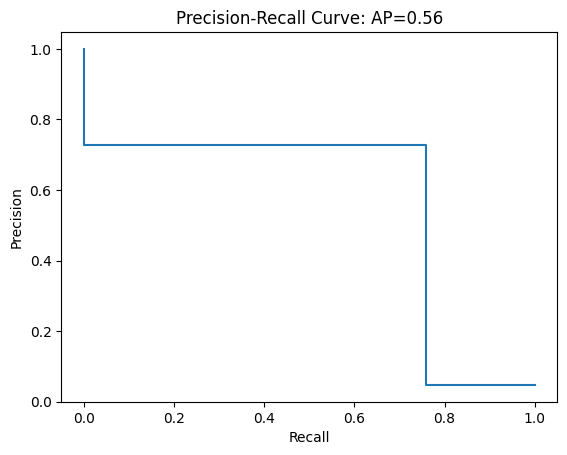

In [23]:
plt.figure()
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve: AP={average_precision:.2f}')
plt.show()

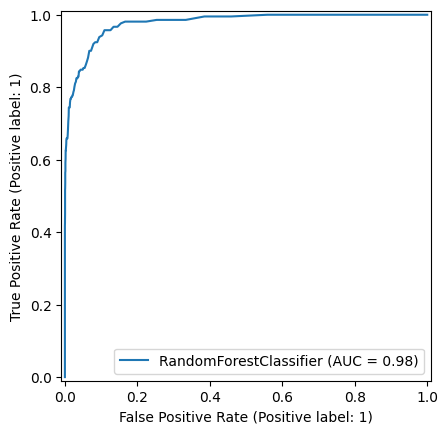

In [24]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
fpr, tpr, threshold = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

RocCurveDisplay.from_estimator(rf, X_test, Y_test)

### Final Report of our Model

In [25]:
report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4259
           1       0.73      0.76      0.74       211

    accuracy                           0.98      4470
   macro avg       0.86      0.87      0.86      4470
weighted avg       0.98      0.98      0.98      4470



### Salvando predições

In [26]:
X_test_pred = X_test.copy()  # Faça uma cópia do DataFrame X_test
X_test_pred["predicao"] = y_pred  # Adicione a coluna "predicao" com os valores de y_pred


In [27]:
X_test_pred = X_test_pred[['predicao']]
X_test_pred.head()


,predicao
10377,0
16516,0
6087,1
1285,0
10573,0


In [28]:
raw_data = pd.read_csv('../dataset/fake_job_postings.csv')
raw_data.drop(columns=['job_id'],inplace=True)

In [29]:
raw_data.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [30]:
data_pred = raw_data.merge(X_test_pred, left_index=True, right_index=True, how='left')

In [31]:
X_test_pred.head()

,predicao
10377,0
16516,0
6087,1
1285,0
10573,0


In [32]:
data_pred.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,predicao
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,NaN
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NaN
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,0.0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,NaN
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,NaN


In [33]:
data_filtrado = data_pred.dropna(subset=['predicao'])

In [34]:
data_filtrado.shape

(4470, 18)

In [35]:
import pickle
with open('../resultados/predicoes_raw_rf.pkl', 'wb') as f:
    pickle.dump(data_filtrado, f)

data_filtrado.to_csv('../resultados/predicoes_raw_rf.csv')

# LIME

In [36]:
from lime import lime_tabular

In [37]:
# Criando o explicador
explainer = lime_tabular.LimeTabularExplainer(X_train_sm.values,
                                                   feature_names= X_train_sm.columns,
                                                   class_names= ["real job","fake job"],
                                                   discretize_continuous=False)

In [38]:
X_test

,telecommuting,has_company_logo,has_questions,salary_min,salary_max,employment_type_-,employment_type_Contract,employment_type_Full-time,employment_type_Other,employment_type_Part-time,...,required_education_Vocational - HS Diploma,title_vector,location_vector,department_vector,company_profile_vector,description_vector,requirements_vector,benefits_vector,industry_vector,function_vector
10377,0,1,0,0,0,0,0,1,0,0,...,0,-0.003962,0.070271,0.000000,-0.090977,0.016053,0.017330,0.000000,-0.044660,-0.101499
16516,0,1,0,90,150,0,0,1,0,0,...,0,0.021611,0.122119,0.000000,0.014225,0.003874,0.000000,0.000000,-0.080846,-0.022311
6087,0,0,0,0,0,0,0,1,0,0,...,0,-0.172105,0.128017,0.000000,0.000000,0.009502,-0.033398,0.000000,-0.300484,0.000000
1285,0,1,1,0,0,0,0,1,0,0,...,0,0.062540,0.084722,0.000000,-0.027113,0.025841,0.015845,0.057674,-0.084057,0.131404
10573,0,1,0,0,0,1,0,0,0,0,...,0,-0.003605,0.030940,0.000000,0.000000,0.004361,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17879,0,1,1,0,0,0,0,1,0,0,...,0,-0.022998,0.101246,0.115653,0.053411,0.033195,0.016013,0.000000,-0.072177,0.115653
4254,0,1,1,0,0,0,0,1,0,0,...,0,-0.053745,0.000000,0.000000,-0.045066,-0.025573,-0.039996,0.016521,0.000000,0.131404
7071,0,1,1,0,0,1,0,0,0,0,...,0,-0.089551,0.006354,0.000000,-0.045066,-0.016597,-0.099732,0.065044,0.000000,0.000000
9967,0,1,1,0,0,0,0,1,0,0,...,0,0.059682,0.079187,0.092472,0.029032,0.035853,0.027581,0.000000,-0.072177,0.092472


### Fake Job

In [45]:
# index from X_test to explain
# 345 - REAL -> negative_pred_indices = [i for i, (pred, real) in enumerate(zip(y_pred, Y_test)) if pred == 0]
# 0 | 2 | 18 | 48 - FAKE -> negative_pred_indices = [i for i, (pred, real) in enumerate(zip(y_pred, Y_test)) if pred == 1]
i = 0

# getting the info from this case
print(X_test.iloc[i,:])
print(Y_test.iloc[i])

telecommuting                                           0.000000
has_company_logo                                        1.000000
has_questions                                           0.000000
salary_min                                              0.000000
salary_max                                              0.000000
employment_type_-                                       0.000000
employment_type_Contract                                0.000000
employment_type_Full-time                               1.000000
employment_type_Other                                   0.000000
employment_type_Part-time                               0.000000
employment_type_Temporary                               0.000000
required_experience_-                                   0.000000
required_experience_Associate                           0.000000
required_experience_Director                            0.000000
required_experience_Entry level                         1.000000
required_experience_Execu

In [46]:
negative_pred_indices = [i for i, (pred, real) in enumerate(zip(y_pred, Y_test)) if pred == 1]
print(negative_pred_indices)

[2, 5, 16, 23, 41, 50, 62, 66, 71, 109, 119, 120, 135, 140, 144, 153, 177, 181, 205, 230, 232, 246, 253, 303, 305, 314, 319, 357, 368, 382, 399, 432, 444, 463, 490, 521, 593, 597, 603, 607, 613, 621, 647, 653, 704, 763, 778, 814, 837, 840, 855, 915, 959, 962, 994, 1024, 1044, 1047, 1076, 1091, 1100, 1110, 1121, 1131, 1147, 1157, 1169, 1183, 1202, 1243, 1270, 1286, 1293, 1312, 1334, 1346, 1352, 1360, 1367, 1386, 1396, 1460, 1479, 1483, 1487, 1491, 1505, 1513, 1550, 1603, 1608, 1618, 1659, 1696, 1714, 1798, 1801, 1804, 1819, 1822, 1829, 1837, 1861, 1889, 1929, 1940, 1947, 1967, 1979, 2049, 2086, 2137, 2151, 2165, 2228, 2233, 2240, 2248, 2249, 2264, 2271, 2302, 2311, 2362, 2383, 2427, 2428, 2458, 2521, 2528, 2536, 2546, 2547, 2563, 2579, 2599, 2680, 2684, 2716, 2751, 2825, 2842, 2847, 2871, 2920, 2929, 2948, 2968, 2969, 2978, 2979, 2998, 3006, 3022, 3034, 3035, 3106, 3159, 3166, 3202, 3205, 3206, 3208, 3232, 3264, 3278, 3306, 3310, 3321, 3326, 3339, 3343, 3380, 3388, 3391, 3401, 3416, 342

In [40]:

exp = explainer.explain_instance(X_test.iloc[i,:], rf.predict_proba, num_features= 5,top_labels = 0)

exp.show_in_notebook(show_table=True, show_all=False)



/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Real job

In [41]:
# Real job index
i = 345

# getting the info from this case
print(X_test.iloc[i,:])
print(Y_test.iloc[i])

telecommuting                                           0.000000
has_company_logo                                        1.000000
has_questions                                           0.000000
salary_min                                              0.000000
salary_max                                              0.000000
employment_type_-                                       0.000000
employment_type_Contract                                0.000000
employment_type_Full-time                               1.000000
employment_type_Other                                   0.000000
employment_type_Part-time                               0.000000
employment_type_Temporary                               0.000000
required_experience_-                                   0.000000
required_experience_Associate                           0.000000
required_experience_Director                            0.000000
required_experience_Entry level                         0.000000
required_experience_Execu

In [42]:

exp = explainer.explain_instance(X_test.iloc[i,:], rf.predict_proba, num_features= 5,top_labels = 0)

exp.show_in_notebook(show_table=True, show_all=False)



/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Shapley Values

In [43]:
! pip3 install shap


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


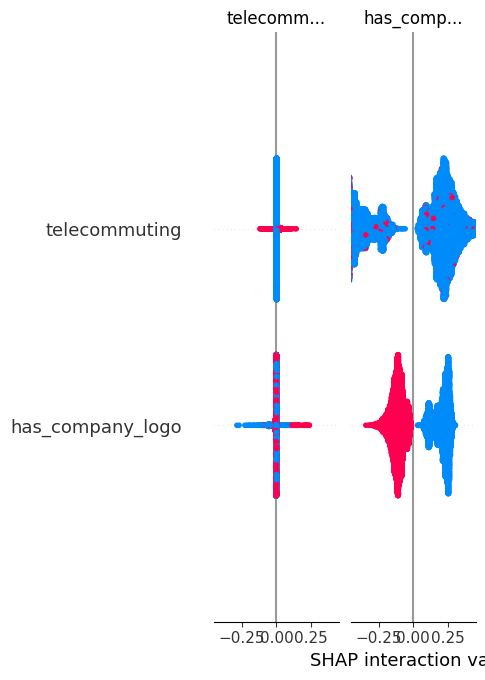

In [44]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train_sm)
shap.summary_plot(shap_values, X_train_sm, plot_type="bar")